### Load rOMERO-gateway

In [1]:
library(romero.gateway)

Loading required package: rJava
Loading required package: jpeg
Warning message:
“replacing previous import ‘rJava::tail’ by ‘utils::tail’ when loading ‘romero.gateway’”Warning message:
“replacing previous import ‘rJava::str’ by ‘utils::str’ when loading ‘romero.gateway’”Warning message:
“replacing previous import ‘rJava::head’ by ‘utils::head’ when loading ‘romero.gateway’”
*** Welcome to rOMERO 0.1.0.9001 (~ OMERO 5.4.0) ***



### Connect to the server

In [2]:
server <- OMEROServer(host = 'eel.openmicroscopy.org', username='user-1', password='', port= as.integer(4064))
server <- connect(server)

### OMERO dataset and Annotation details

In [3]:
datasetName <- 'Cambridge'
fileName <- 'Cells.csv'
imageSize <- 199 # image size in um

### Find the dataset and get the attachment

In [4]:
searchResult <- searchFor(server, Dataset, 'Name', datasetName)
omeDataset <- searchResult[[1]]
print(omeDataset@dataobject$getId())

# Find the attached csv file
fileAnnotation <- getAnnotations(server, 'DatasetData', getOMEROID(omeDataset), nameFilter = fileName)
annotationFileID = as.integer(fileAnnotation$FileID)
print(annotationFileID)

[1] 21601
[1] 138674


### Load annotation as a R-Dataframe and compare cell areas between the two sets of images

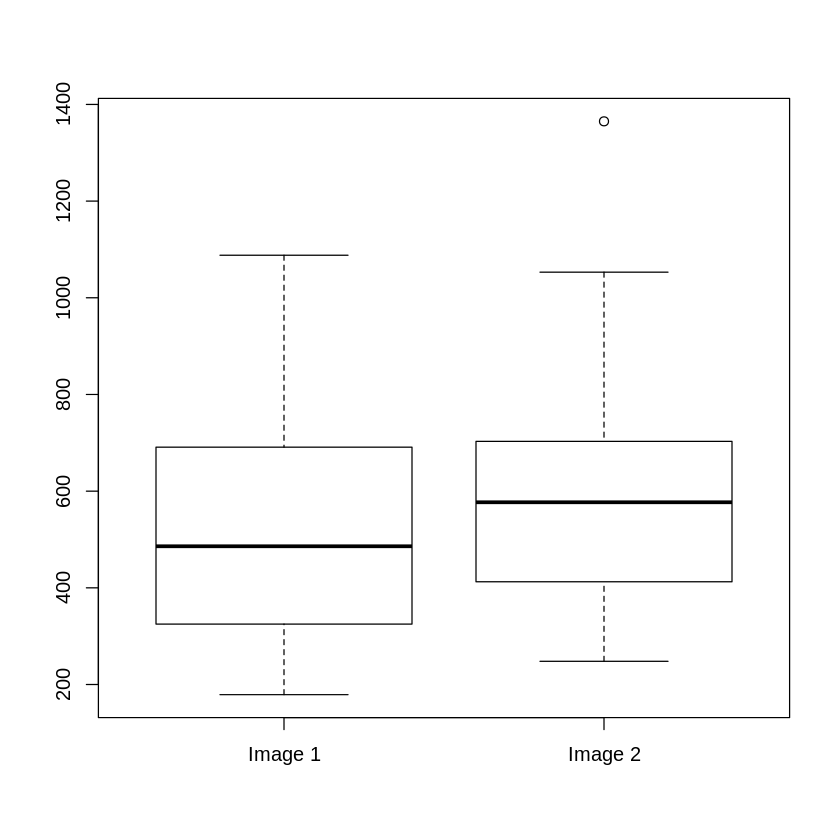

In [5]:
df <- loadCSV(server, annotationFileID)
dfLength <- subset(df, select=c("ImageNumber", "AreaShape_Area"))
boxplot(dfLength$AreaShape_Area~dfLength$ImageNumber, names=c("Image 1", "Image 2"))

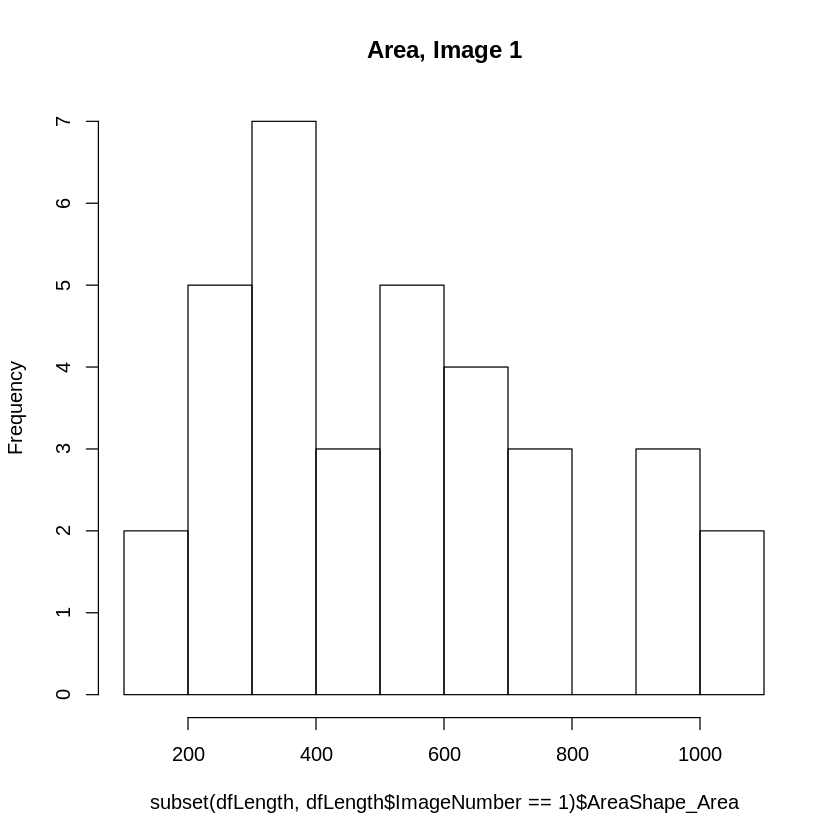

In [6]:
hist(subset(dfLength, dfLength$ImageNumber == 1)$AreaShape_Area, main = "Area, Image 1")

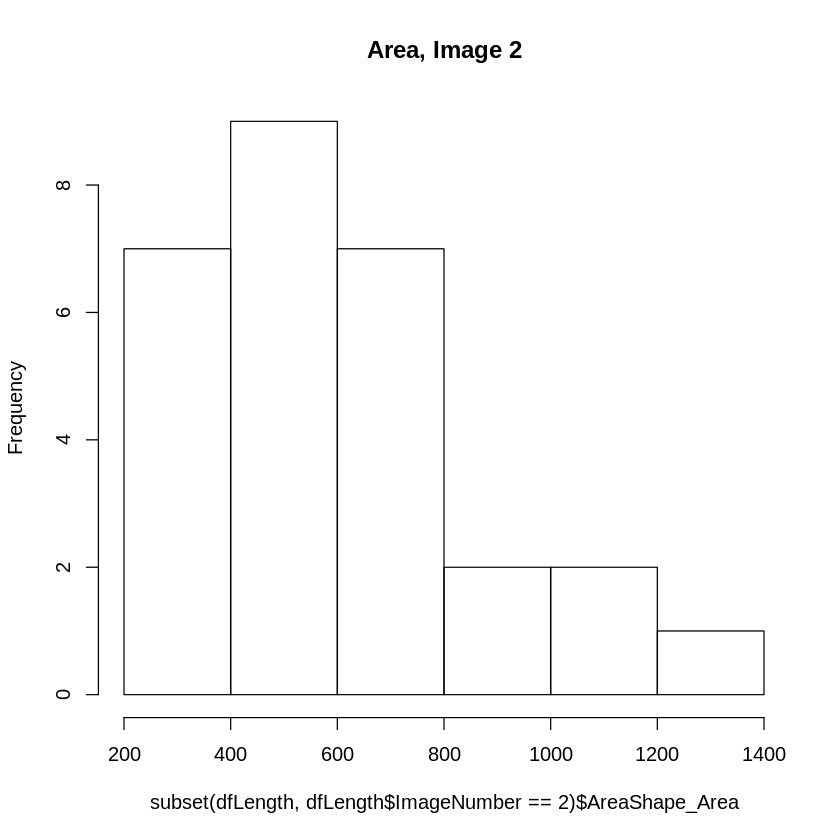

In [7]:
hist(subset(dfLength, dfLength$ImageNumber == 2)$AreaShape_Area, main = "Area, Image 2")

### Save Plot back to OMERO

In [18]:
# Attach the plot to the dataset
tmpfile <- "/tmp/boxplot.png"
png(tmpfile)
boxplot(dfLength$AreaShape_Area~dfLength$ImageNumber, names=c("Image 1", "Image 2"))
dev.off()
attachFile(omeDataset, tmpfile)

pdf 
  2

An object of class "OMERO"
Slot "server":
An object of class "OMEROServer"
Slot "host":
[1] "eel.openmicroscopy.org"

Slot "port":
[1] 4064

Slot "username":
[1] "user-1"

Slot "password":
[1] "ome"

Slot "credentialsFile":
character(0)

Slot "gateway":
[1] "Java-Object{omero.gateway.Gateway@60df60da}"

Slot "user":
[1] "Java-Object{omero.gateway.model.ExperimenterData (id=8)}"

Slot "ctx":
[1] "Java-Object{SecurityContext [groupID=9, experimenter=null, sudo=false, serverInformation=null, compression=0.85]}"


Slot "dataobject":
[1] "Java-Object{omero.gateway.model.FileAnnotationData (id=32607)}"


### Attach the t-test output to the dataset

In [20]:
tmpfile <- "/tmp/summary.txt"
sink(tmpfile)
t.test(dfLength$AreaShape_Area~dfLength$ImageNumber)
sink()
attachFile(omeDataset, tmpfile)


	Hopkins-Skellam test of CSR
	using F distribution

data:  points
A = 1.1956, p-value = 0.4634
alternative hypothesis: two-sided


An object of class "OMERO"
Slot "server":
An object of class "OMEROServer"
Slot "host":
[1] "eel.openmicroscopy.org"

Slot "port":
[1] 4064

Slot "username":
[1] "user-1"

Slot "password":
[1] "ome"

Slot "credentialsFile":
character(0)

Slot "gateway":
[1] "Java-Object{omero.gateway.Gateway@60df60da}"

Slot "user":
[1] "Java-Object{omero.gateway.model.ExperimenterData (id=8)}"

Slot "ctx":
[1] "Java-Object{SecurityContext [groupID=9, experimenter=null, sudo=false, serverInformation=null, compression=0.85]}"


Slot "dataobject":
[1] "Java-Object{omero.gateway.model.FileAnnotationData (id=32608)}"


### Disconnect OMERO session

In [ ]:
disconnect(server)